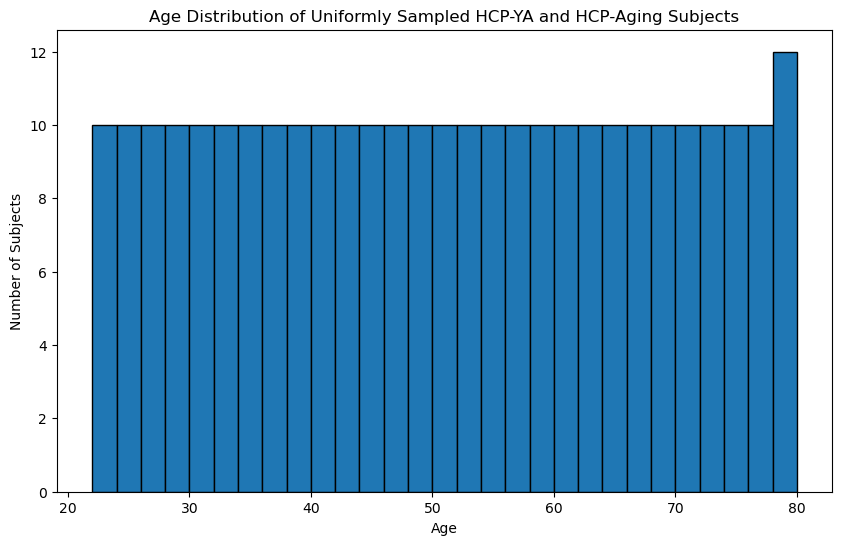

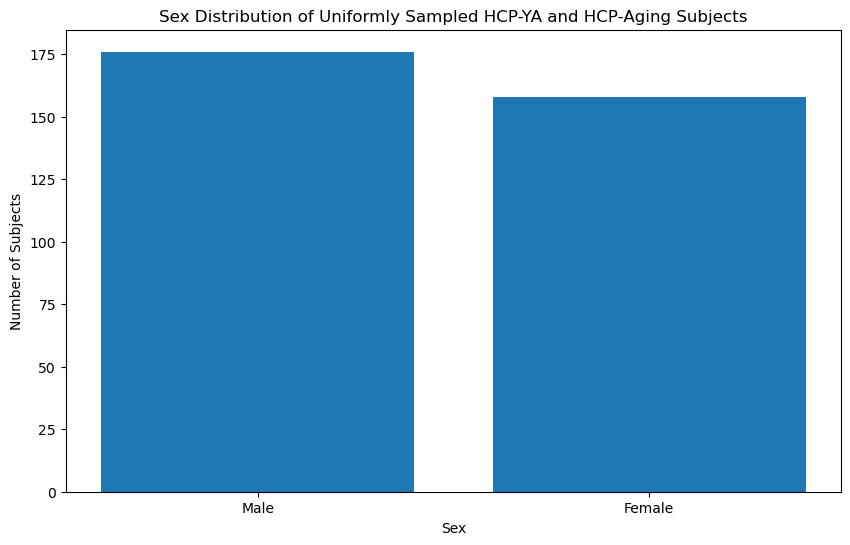

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

trekker_hcpya_dir="/mnt/sauce/littlab/users/mjaskir/structural_tractometry/derivatives/trekker/hcpya"
trekker_hcpaging_dir = "/mnt/sauce/littlab/users/mjaskir/structural_tractometry/derivatives/trekker/hcpaging"
hcpya_demo_path = "/mnt/sauce/littlab/users/mjaskir/structural_tractometry/derivatives/metadata/demo_hcpya.csv"
hcpaging_demo_path = "/mnt/sauce/littlab/users/mjaskir/structural_tractometry/derivatives/metadata/demo_hcpaging.csv"
hcpaging_scanner_id_path = "/mnt/sauce/littlab/users/mjaskir/structural_tractometry/derivatives/metadata/scanner_ids_hcpaging.csv"

# Load demo files
hcpya_demo = pd.read_csv(hcpya_demo_path)
hcpaging_demo = pd.read_csv(hcpaging_demo_path)
hcpaging_scanner_ids = pd.read_csv(hcpaging_scanner_id_path)

def sample_uniform_subjects_per_age(hcpya_demo, hcpaging_demo, num_samples_per_age=5, ya_age_range=range(22, 36), aging_age_range=range(36, 90), seed=42):
    """
    Randomly sample a specified number of subjects per age for HCP-YA and HCP-Aging datasets.

    Parameters:
    - hcpya_demo: DataFrame for HCP-YA demographic data
    - hcpaging_demo: DataFrame for HCP-Aging demographic data
    - num_samples_per_age: Number of subjects to sample per age (default: 5)
    - ya_age_range: Range of ages for HCP-YA (default: 22-35)
    - aging_age_range: Range of ages for HCP-Aging (default: 36-89)

    Returns:
    - DataFrame of uniformly sampled subjects across the specified age ranges
    """
    hcp_uniform_samples = pd.DataFrame(columns=hcpya_demo.columns)
    for age in ya_age_range:
        subs_at_age = hcpya_demo[hcpya_demo['age'].astype(int) == age]
        if len(subs_at_age) >= num_samples_per_age:
            sampled = subs_at_age.sample(n=num_samples_per_age, random_state=seed)
        else:
            sampled = subs_at_age
        hcp_uniform_samples = pd.concat([hcp_uniform_samples, sampled], ignore_index=True)

    for age in aging_age_range:
        subs_at_age = hcpaging_demo[hcpaging_demo['age'].astype(int) == age]
        if len(subs_at_age) >= num_samples_per_age:
            sampled = subs_at_age.sample(n=num_samples_per_age, random_state=seed)
        else:
            print(f"Only {len(subs_at_age)} subjects at age {age} for HCP-Aging")
            sampled = subs_at_age
        hcp_uniform_samples = pd.concat([hcp_uniform_samples, sampled], ignore_index=True)
    return hcp_uniform_samples

hcp_uniform_samples = sample_uniform_subjects_per_age(hcpya_demo, hcpaging_demo)

# Define 2 year bins for HCP-Aging
bins = list(range(22, 82, 2))

# Plot the age distribution of the uniform samples
plt.figure(figsize=(10, 6))
plt.hist(hcp_uniform_samples['age'], bins=bins, edgecolor='black')
plt.title('Age Distribution of Uniformly Sampled HCP-YA and HCP-Aging Subjects')
plt.xlabel('Age')
plt.ylabel('Number of Subjects')
plt.show()

# Plot sex distribution of the uniform samples
plt.figure(figsize=(10, 6))
plt.bar(['Male', 'Female'], hcp_uniform_samples['sex'].value_counts())
plt.title('Sex Distribution of Uniformly Sampled HCP-YA and HCP-Aging Subjects')
plt.xlabel('Sex')
plt.ylabel('Number of Subjects')
plt.show()

# Check if sex is statistically different between males and females
male_samples = hcp_uniform_samples[hcp_uniform_samples['sex'] == 'M']
female_samples = hcp_uniform_samples[hcp_uniform_samples['sex'] == 'F']